In [37]:
import pandas as aju
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score,mean_absolute_error
from sklearn.model_selection import train_test_split

In [9]:
diab = load_diabetes()
dir(diab)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [13]:
df = aju.DataFrame(diab.data,columns = diab.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
df['target'] = diab.target

In [17]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [23]:
df.duplicated().sum()

0

In [25]:
x = df.drop('target',axis = 1)
y = df.target

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state = 0)

In [31]:
gbr = GradientBoostingRegressor(n_estimators= 500,random_state = 99)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=500, random_state=99)

In [33]:
y_pred = gbr.predict(x_test)

In [39]:
mae = mean_absolute_error(y_pred,y_test)
mae

50.281664750305474

In [51]:
feature_scores = aju.Series(gbr.feature_importances_,index = x_train.columns)

In [53]:
feature_scores

age    0.040163
sex    0.007655
bmi    0.214593
bp     0.090311
s1     0.051778
s2     0.088466
s3     0.056883
s4     0.031518
s5     0.376153
s6     0.042480
dtype: float64

<Axes: xlabel='None', ylabel='None'>

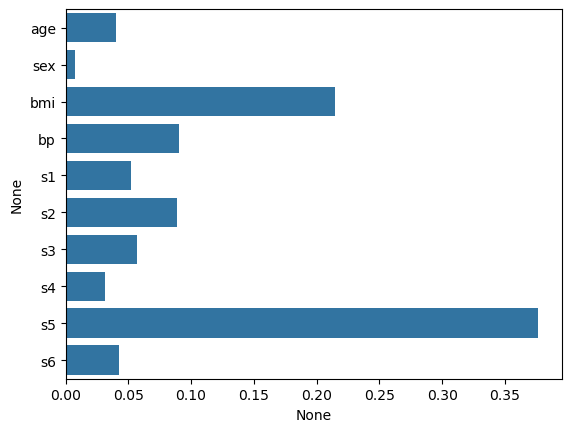

In [55]:
sns.barplot(x = feature_scores,y = feature_scores.index)